In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
from matplotlib import cm
import anacal
import astropy.table as astTable
import glob

import numpy as np
import lsst.geom as geom
from astropy.io import ascii as astascii
import anacal
import astropy.table as astTable
import fitsio
import xlens
from matplotlib.ticker import MaxNLocator
import numpy.lib.recfunctions as rfn
import lsst.afw.table as afwTable
import pandas as pd

In [496]:
full = astTable.Table.read("tracts_fdfc_v1_trim6.fits")
for d in full:
    tid = d["tract"]
    patch_db = d["patch"]
    patch_x = patch_db // 100
    patch_y = patch_db % 100
    pid = patch_x + patch_y * 9
    if ("99" in str(tid)) and patch_db ==408:
        break

In [497]:
d1 = fitsio.read(f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal/{tid}/{pid}/match.fits")
d2 = fitsio.read(f"/work/xiangchong.li/superonionGW/code/hsc_final/HSC_S23B_Shapes/sql/database/s23b-gals2/tracts/{tid}.fits")
d1 = rfn.rename_fields(d1, {"i_id": "object_id"})
df1 = pd.DataFrame(d1.byteswap().newbyteorder())
df2 = pd.DataFrame(d2.byteswap().newbyteorder())
merge = pd.merge(df1, df2, on='object_id', how='inner')

In [498]:
ff = (180 / np.pi) * 3600 / 0.168
j11 = merge["i_base_LocalWcs_CDMatrix_1_1"] * ff * -1
j12 = merge["i_base_LocalWcs_CDMatrix_1_2"] * ff
j21 = merge["i_base_LocalWcs_CDMatrix_2_1"] * ff * -1
j22 = merge["i_base_LocalWcs_CDMatrix_2_2"] * ff

In [499]:
e1_s = (merge["i_hsmpsfmoments_shape11"] - merge["i_hsmpsfmoments_shape22"]) / (merge["i_hsmpsfmoments_shape11"] + merge["i_hsmpsfmoments_shape22"])
e1_p = (merge["i_ext_shapeHSM_HsmPsfMoments_xx"] - merge["i_ext_shapeHSM_HsmPsfMoments_yy"]) / (merge["i_ext_shapeHSM_HsmPsfMoments_xx"] + merge["i_ext_shapeHSM_HsmPsfMoments_yy"])

In [500]:
e2_s = 2.0 * merge["i_hsmpsfmoments_shape12"] / (merge["i_hsmpsfmoments_shape11"] + merge["i_hsmpsfmoments_shape22"])
e2_p = -2.0 * merge["i_ext_shapeHSM_HsmPsfMoments_xy"] / (merge["i_ext_shapeHSM_HsmPsfMoments_xx"] + merge["i_ext_shapeHSM_HsmPsfMoments_yy"]) 
(e2_s - e2_p) 

0       0.000200
1       0.000200
2       0.000213
3       0.000213
4       0.000213
          ...   
1428    0.000208
1429    0.000208
1430    0.000172
1431    0.000172
1432    0.000206
Length: 1433, dtype: float64

In [501]:
-e1_p * (j12 - j21) + (j12 + j21)

0      -0.000021
1      -0.000020
2      -0.000017
3      -0.000018
4      -0.000017
          ...   
1428    0.000020
1429    0.000021
1430   -0.000017
1431   -0.000017
1432    0.000015
Length: 1433, dtype: float64

In [502]:
(e1_s - e1_p) 

0      -0.000072
1      -0.000072
2      -0.000092
3      -0.000092
4      -0.000091
          ...   
1428   -0.000077
1429   -0.000077
1430   -0.000070
1431   -0.000070
1432   -0.000087
Length: 1433, dtype: float64

In [503]:
e2_p * (j12 - j21) +  (j11 - j22)

0       0.000053
1       0.000053
2       0.000050
3       0.000051
4       0.000051
          ...   
1428    0.000094
1429    0.000094
1430    0.000063
1431    0.000063
1432    0.000088
Length: 1433, dtype: float64

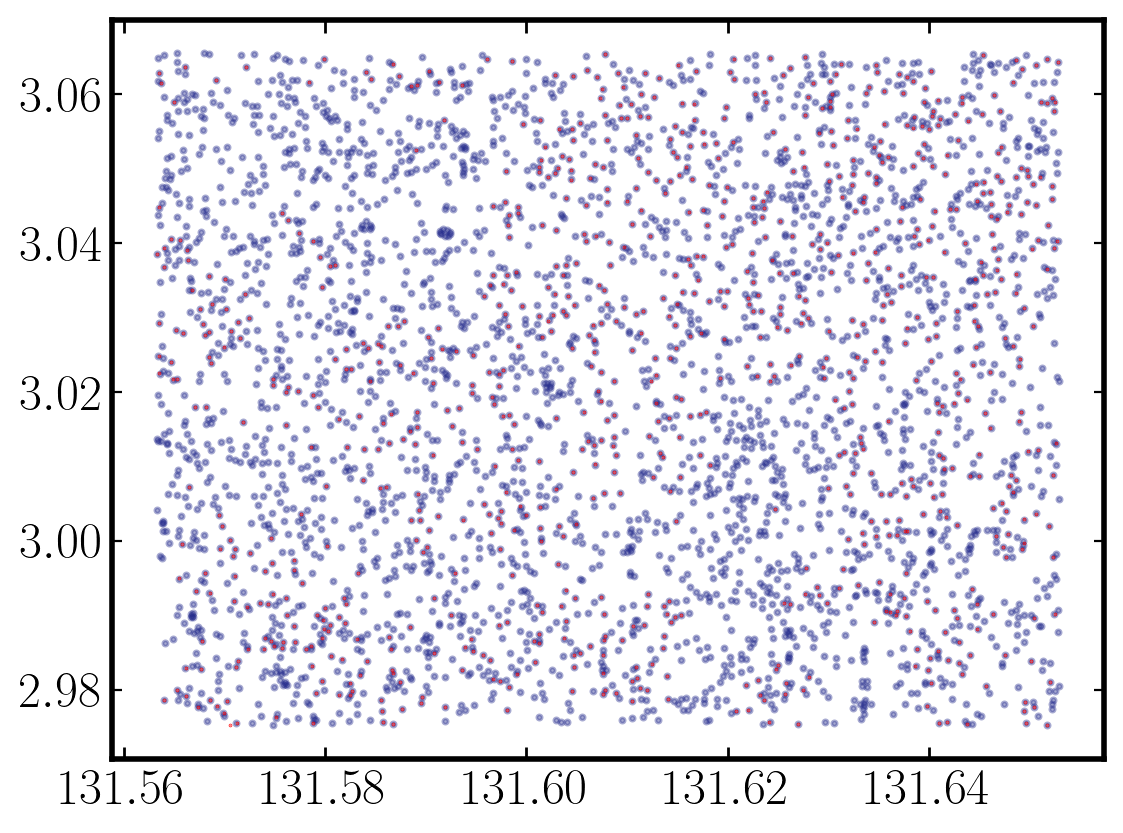

In [98]:
plt.scatter(d4["coord_ra"] * 180 / np.pi, d4["coord_dec"] * 180 / np.pi,  s=3.5, alpha=0.4)
plt.scatter(d1["ra"], d1["dec"], s=0.1, color="red", alpha=0.8)

In [242]:
full = astTable.Table.read("tracts_fdfc_v1_trim6.fits")
for d in full[0:1]:
    tid = d["tract"]
    patch_db = d["patch"]
    patch_x = patch_db // 100
    patch_y = patch_db % 100
    pid = patch_x + patch_y * 9
    fn = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal/{tid}/{pid}/match.fits"
    a = fitsio.read(fn)

(array([  3.,  34.,   0., 169.,   0., 383., 475.,   0., 423., 232.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

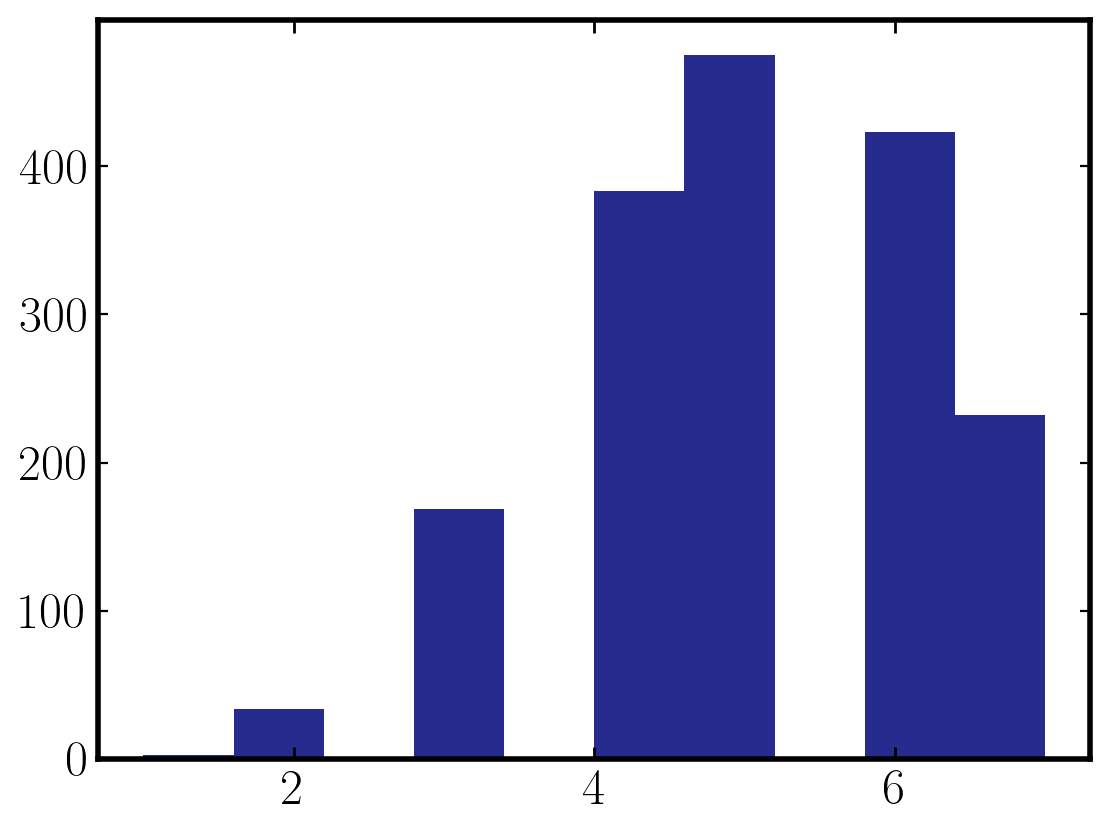

In [251]:
plt.hist(a["y_inputs"])

In [253]:
np.average(full2["i_inputs"])

6.067109141826259

(array([   0.,    0.,    0.,    0.,    0.,    0.,   59.,  218.,  466.,
         773., 1041., 1564., 2356., 2762., 2648., 2657., 2466., 2422.,
        2214., 1900., 1686., 1580., 1517., 1412., 1093.,  872.,  805.,
         688.,  582.,  488.,  403.,  353.,  259.,  217.,  232.,  172.,
         131.,  124.,   96.,   90.,   78.,   68.,   60.,   59.,   47.,
          48.,   34.,   33.,   27.,   21.]),
 array([ 3.  ,  3.16,  3.32,  3.48,  3.64,  3.8 ,  3.96,  4.12,  4.28,
         4.44,  4.6 ,  4.76,  4.92,  5.08,  5.24,  5.4 ,  5.56,  5.72,
         5.88,  6.04,  6.2 ,  6.36,  6.52,  6.68,  6.84,  7.  ,  7.16,
         7.32,  7.48,  7.64,  7.8 ,  7.96,  8.12,  8.28,  8.44,  8.6 ,
         8.76,  8.92,  9.08,  9.24,  9.4 ,  9.56,  9.72,  9.88, 10.04,
        10.2 , 10.36, 10.52, 10.68, 10.84, 11.  ]),
 <BarContainer object of 50 artists>)

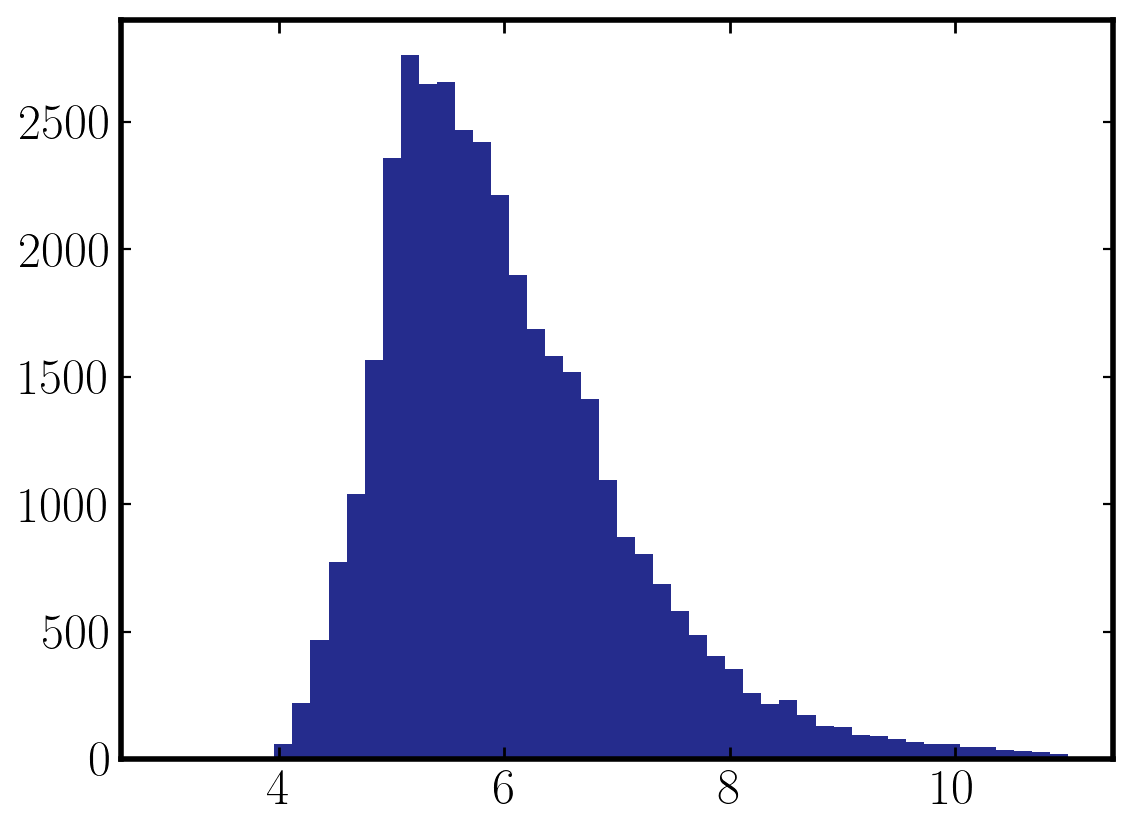

In [262]:
plt.hist(full2["i_inputs"], bins=50, range=(3, 11))

In [263]:
np.sum(full2["i_inputs"] > 5)

31854

In [6]:
# Load catalog
data = []
full = astTable.Table.read("tracts_fdfc_v1_trim6.fits")
for d in full:
    tid = d["tract"]
    patch_db = d["patch"]
    patch_x = patch_db // 100
    patch_y = patch_db % 100
    pid = patch_x + patch_y * 9
    fn = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal/{tid}/{pid}/system.fits"
    data.append(tuple(fitsio.read(fn)))
    
names=[
    "variance", "e1_psf2", "e2_psf2", "e1_psf4", "e2_psf4",
    "fwhm", "sum_e1", "sum_e2", "sum_r1", "sum_r2"
]
data = astTable.Table(rows=data, names=names)

In [10]:
np.sum(data["sum_e1"][msk]) / np.sum(data["sum_r1"][msk])

4.592405771893975e-05

In [22]:
data[data["sum_r1"] > 3000]

variance,e1_psf2,e2_psf2,e1_psf4,e2_psf4,fwhm,sum_e1,sum_e2,sum_r1,sum_r2
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.003850305441670707,-0.012413726200558157,0.02991027789812756,0.0038598709790597617,-0.007190973060484817,0.6096767813656038,-2.9736413372428747,6.966393315957718,3325.9512134914235,1239.6656606301963
0.0033493279627455894,-0.03548107650203628,-0.0472193299197803,-0.004503682050322672,0.0032278600224003398,0.5030749047240781,-5.3557096721969195,7.116057107524572,4130.457760748501,899.4259049119739
0.003624026335228596,-0.1103373808999799,0.045616214141175504,0.014919818005450721,-0.004001883767592882,0.5117603626510799,8.244696047858499,4.74536742490796,4239.892244619745,-357.54388575357734
0.0035811511125888,-0.034281601532817355,0.00020718776172940016,0.0009376233208561792,0.003536905741804461,0.6885175862943723,-4.241400062821351,-3.868022275177312,10486.894483987102,8266.597806260748
0.002749903954085146,-0.005389650995139479,-0.01688733801951915,0.0023887078219202765,0.005611957644530211,0.5855365917799632,0.9986050004430589,0.754347769285955,3313.6681085386813,-234.04587534851626


In [21]:
full[data["sum_r1"] > 3000]

tract,patch,field,ra,dec,index,variance,e1_psf2,e2_psf2,e1_psf4,e2_psf4,fwhm,sum_e1,sum_e2,sum_r1,sum_r2,g_inputs,r_inputs,i_inputs,z_inputs,y_inputs,dsize
int32,int32,bytes8,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32
10090,407,spring3,202.31402618933834,4.27901376469133,935,0.0038654213676727555,-0.012262289362948313,0.029922925866251966,0.003858351585793914,-0.007190629886690295,0.6097099138830709,-7.186979601462004,2.3939673402592336,3544.957388430209,1439.6978550657777,3.2833797585886724,3.794800371402043,4.61058495821727,4.391457753017642,4.603156917363045,0.0012169847
9353,101,spring2,188.70822523070288,-1.3036982229307497,17180,0.0033597002501911254,-0.035169428548778386,-0.04699700011317998,-0.004493610703891815,0.0032471922841518022,0.5029282670309377,-6.221233519480683,11.750151439264899,4300.319163828687,999.3317814425657,3.433560653027485,3.4207480884480264,4.982021078735276,4.977887993387063,4.966522008679479,-0.00025029178
9589,505,spring2,177.59106480817752,0.9304860524110273,29530,0.0036449010324083107,-0.11051485113509775,0.04559384537213918,0.014896385201411422,-0.004017563101685125,0.5115871578093305,12.280452743215358,4.432577067732104,4312.474831175028,-251.2000947897646,4.186468646864687,4.203441772748703,6.158415841584159,6.148750589344648,5.315181518151816,-0.0029964794
9575,400,spring1,157.03701370567228,-0.0004664821097981645,30758,0.0035888618942188557,-0.034444572807254575,-0.0001813808470459446,0.000995840241098094,0.0035636505903413277,0.6883330809969772,-3.8730209401368194,-11.408167441143402,10374.277102376835,8363.256607572992,4.031700288184438,4.93124742692466,5.041169205434335,4.997118155619597,5.925895430218197,-0.0031301235
9611,802,spring3,209.626055813309,0.37046567419861837,37607,0.0027489472468706947,-0.005202176943237618,-0.016943126282214237,0.002389131687186447,0.005730964510637258,0.5854370989110594,-2.141633862016375,0.3570856409631573,3446.879011240207,-146.11582600480284,4.2507534659433395,4.255575647980711,7.586497890295359,7.596745027124774,7.206148282097649,-0.006112525


In [23]:
np.sum(data["sum_r1"]) 

23283513.20756357

In [24]:
np.sum(data["sum_r2"])

23509081.359277

(array([1.410e+02, 2.900e+02, 6.550e+02, 1.176e+03, 1.393e+03, 2.079e+03,
        2.814e+03, 2.999e+03, 2.584e+03, 1.966e+03, 1.596e+03, 1.785e+03,
        2.134e+03, 2.634e+03, 2.877e+03, 2.962e+03, 2.690e+03, 2.153e+03,
        1.597e+03, 1.071e+03, 6.630e+02, 4.380e+02, 2.330e+02, 1.570e+02,
        9.200e+01, 5.400e+01, 3.900e+01, 1.900e+01, 2.000e+01, 1.600e+01,
        1.200e+01, 1.400e+01, 9.000e+00, 8.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300.,

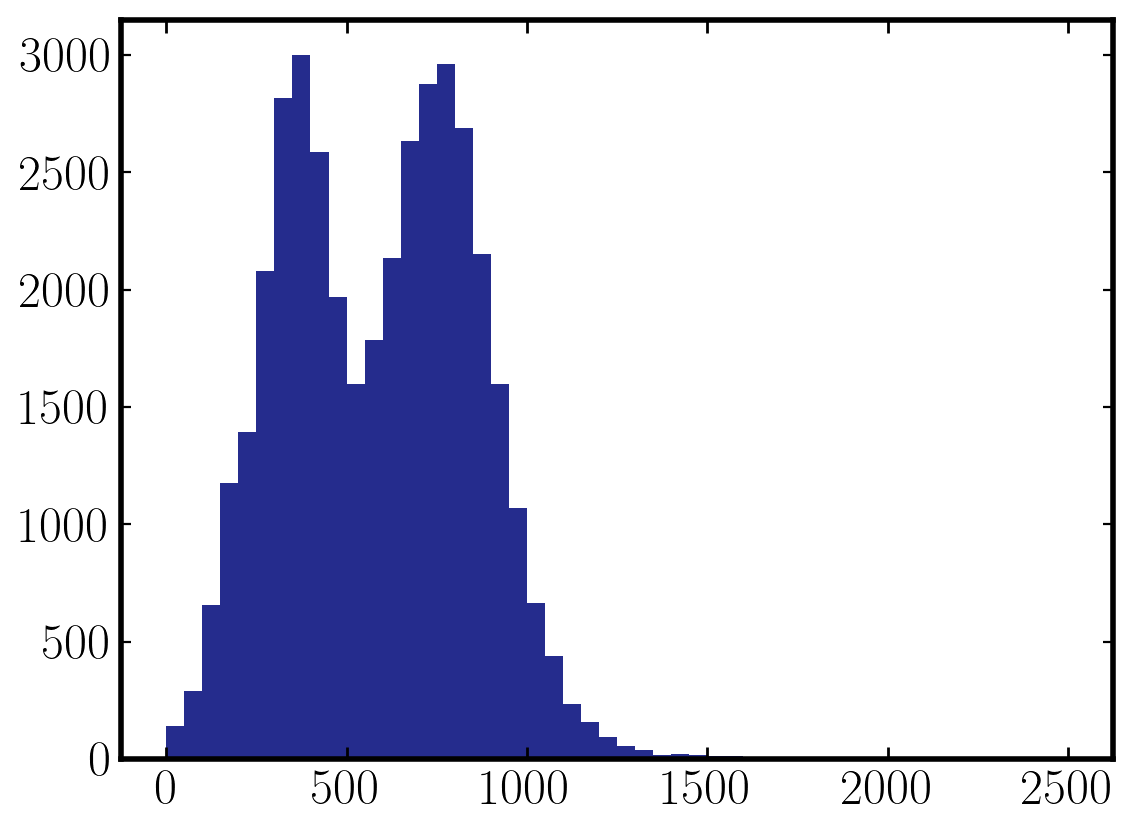

In [17]:
plt.hist(data["sum_r1"], bins=50, range=(0, 2500))

(array([1.050e+02, 2.240e+02, 6.260e+02, 1.093e+03, 1.345e+03, 1.894e+03,
        2.811e+03, 3.288e+03, 2.691e+03, 1.831e+03, 1.440e+03, 1.552e+03,
        2.103e+03, 2.560e+03, 2.976e+03, 3.141e+03, 2.939e+03, 2.295e+03,
        1.755e+03, 1.105e+03, 6.890e+02, 3.760e+02, 1.990e+02, 1.290e+02,
        6.700e+01, 5.400e+01, 2.800e+01, 2.800e+01, 1.300e+01, 2.000e+00,
        1.300e+01, 7.000e+00, 1.000e+00, 6.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300.,

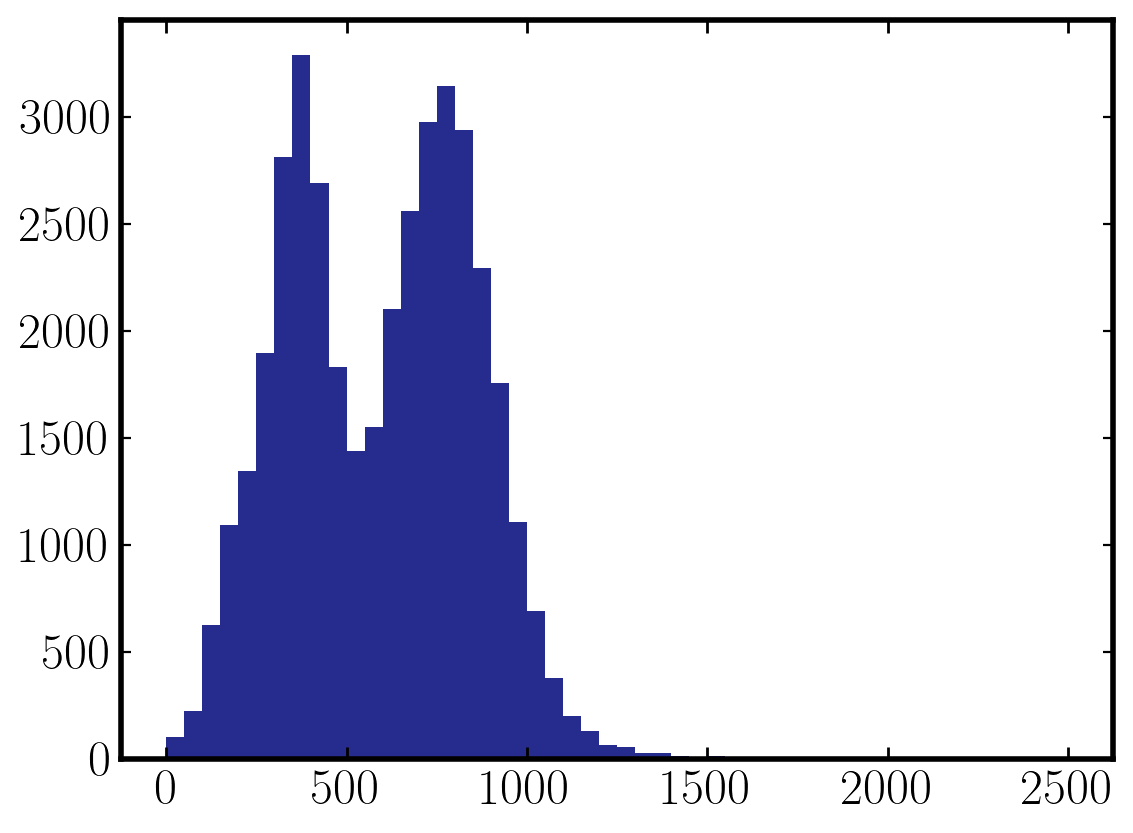

In [18]:
plt.hist(data["sum_r2"], bins=50, range=(0, 2500))

In [9]:
np.sum(data["sum_e2"][msk]) / np.sum(data["sum_r2"][msk])

4.583171501500762e-05

In [2]:
# Load catalog
full = astTable.Table.read("tracts_fdfc_v1_trim6.fits")

# All keys to extract
keys = ["e1_2", "r1_2", "e2_2", "r2_2", "e1_4", "r1_4", "e2_4", "r2_4",
        "e1_s", "r1_s", "e2_s", "r2_s", "e1_v", "r1_v", "e2_v", "r2_v"]

# Initialize containers
data = {k: [] for k in keys}
# Loop through entries
for d in full:
    tid = d["tract"]
    patch_db = d["patch"]
    patch_x = patch_db // 100
    patch_y = patch_db % 100
    pid = patch_x + patch_y * 9

    fn = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal/{tid}/{pid}/leakage3.fits"
    tab = fitsio.read(fn)
    for k in keys:
        data[k].append(np.asarray(tab[k]))

# Stack arrays
for k in keys:
    data[k] = np.vstack(data[k])

In [3]:
full = astTable.Table.read("tracts_fdfc_v1_trim6.fits")
msk = (full["variance"] > 2e-3) & (full["variance"] < 8e-3) & (full["fwhm"] > 0.45) & (full["fwhm"] < 0.85) 
msk = msk & (full["g_inputs"] > 3) & (full["r_inputs"] >3) & (full["i_inputs"] > 4) & (full["z_inputs"] > 4) & (full["y_inputs"] > 4)
msk = msk & (np.sqrt(full["e1_psf4"] ** 2.0 + full["e2_psf4"] ** 2.0) < 3e-2)
msk = msk & (np.sqrt(full["e1_psf2"] ** 2.0 + full["e2_psf2"] ** 2.0) < 0.15)
msk = msk & (np.abs(full["dsize"]) < 0.015)

suffixes = ["2", "4", "s", "v"]
ave = {}
std = {}

n_bootstraps = 100
n = np.sum(msk).astype(int)
print(n)
indices = np.random.randint(0, n, size=(n_bootstraps, n))

for suffix in suffixes:
    e1 = data[f"e1_{suffix}"][msk]
    r1 = data[f"r1_{suffix}"][msk]
    e2 = data[f"e2_{suffix}"][msk]
    r2 = data[f"r2_{suffix}"][msk]
    print(suffix)
    
    ave[f"ave1_{suffix}"] = np.sum(e1, axis=0) / np.sum(r1, axis=0)
    ave[f"ave2_{suffix}"] = np.sum(e2, axis=0) / np.sum(r2, axis=0) 
    print("g1: ", np.sum(e1) / np.sum(r1))
    print("g2: ", np.sum(e2) / np.sum(r2))
    
    up1 = np.sum(e1[indices], axis=1)
    down1 = np.sum(r1[indices], axis=1)
    up2 = np.sum(e2[indices], axis=1)
    down2 = np.sum(r2[indices], axis=1)
    std[f"std1_{suffix}"] = np.std(up1 / down1, axis=0)
    std[f"std2_{suffix}"] = np.std(up2 / down2, axis=0)
    
print(np.sum(full["sum_e1"][msk]) / np.sum(full["sum_r1"][msk]))
print(np.sum(full["sum_e2"][msk]) / np.sum(full["sum_r2"][msk]))

36697
2
g1:  -4.813274004076867e-05
g2:  0.0001290662631076058
4
g1:  5.106030616360029e-05
g2:  7.836224985681909e-05
s
g1:  6.238500223880981e-05
g2:  6.031778514224263e-05
v
g1:  -2.1923355868066406e-05
g2:  8.063063108878716e-05
0.0003318818689596177
-5.56534738760859e-05


In [239]:
import dask.dataframe as dd
ddf = dd.read_parquet("/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal/leakage", engine="pyarrow")

In [241]:
ddf.compute()

,e_psf_2,e1_2,r1_2,e2_2,r2_2,e_psf_4,e1_4,r1_4,e2_4,r2_4,...,r1_s,e2_s,r2_s,var,e1_v,r1_v,e2_v,r2_v,tract,patch
0,-4.800000e-02,0.397063,1.308598,-5.405413,189.492524,-0.016,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0025,0.000000,0.000000,0.000000,0.000000,8279,63
1,-2.400000e-02,4.509761,128.407895,0.000000,0.000000,-0.008,0.082949,-10.730151,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0035,2.721979,43.942570,-0.649011,36.594529,8279,63
2,6.938894e-18,2.386549,136.450962,0.000000,0.000000,0.000,5.582062,270.650395,2.640593,71.689553,...,0.000000,0.000000,0.000000,0.0045,0.225766,120.934468,-1.916235,102.607184,8279,63
3,2.400000e-02,0.615633,2.915231,0.000000,0.000000,0.008,2.030764,9.651120,-6.782188,181.402760,...,0.000000,0.000000,0.000000,0.0055,2.551896,79.267678,-2.508674,75.463426,8279,63
4,4.800000e-02,-0.213232,0.488679,0.000000,0.000000,0.016,0.000000,0.000000,-0.590025,4.181461,...,37.880386,-1.306873,25.604543,0.0065,0.759788,8.005220,0.386540,30.464314,8279,63
0,-4.800000e-02,0.213236,81.801421,-0.546852,24.958432,-0.016,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0025,0.000000,0.000000,0.000000,0.000000,8522,79
1,-2.400000e-02,1.742518,398.593333,0.871193,382.900153,-0.008,0.000000,0.000000,-1.030894,35.473305,...,0.000000,0.000000,0.000000,0.0035,0.236092,3.971278,-0.222787,5.547289,8522,79
2,6.938894e-18,-0.404847,18.374894,-0.515096,35.291967,0.000,1.408922,425.608450,1.084734,401.559697,...,0.000000,0.000000,0.000000,0.0045,2.563810,294.836817,1.156571,242.578080,8522,79
3,2.400000e-02,0.000000,0.000000,0.000000,0.000000,0.008,-0.219951,80.081383,-0.244595,6.117551,...,0.000000,0.000000,0.000000,0.0055,-2.924126,149.732756,-1.837036,109.486852,8522,79
4,4.800000e-02,0.000000,0.000000,0.000000,0.000000,0.016,0.000000,0.000000,0.000000,0.000000,...,84.102100,0.262030,71.673460,0.0065,1.402741,31.766543,1.028890,51.979516,8522,79


[-0.00404926 -0.00012073]
[-0.01558947  0.00023743]
[-0.04458824  0.00017295]
[-1.41076705e-02  8.06376795e-05]
[ 0.00377313 -0.00224176]
[-0.00054885  0.0004042 ]
[-1.35856384e-02 -7.39728817e-06]
[ 0.07493572 -0.00021009]


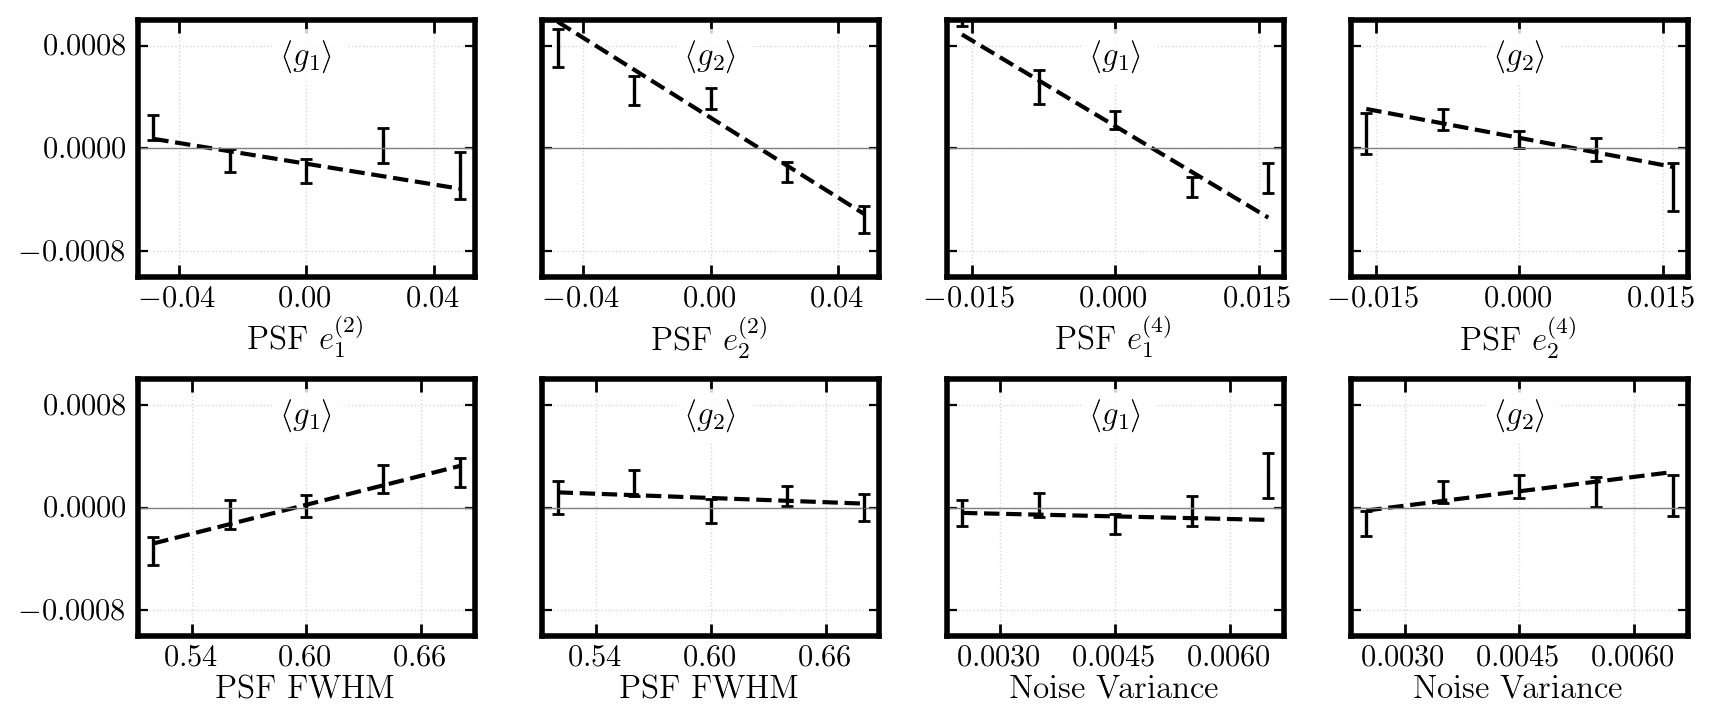

In [4]:
# Construct x_data
x_data = np.vstack([
    tab["e_psf_2"], tab["e_psf_2"],
    tab["e_psf_4"], tab["e_psf_4"],
    tab["size"],      tab["size"],
    tab["var"],       tab["var"]
])

# Construct y_data and y_errs from the ave/std dicts
pairs = [
    ("ave1_2", "std1_2"),
    ("ave2_2", "std2_2"),
    ("ave1_4", "std1_4"),
    ("ave2_4", "std2_4"),
    ("ave1_s", "std1_s"),
    ("ave2_s", "std2_s"),
    ("ave1_v", "std1_v"),
    ("ave2_v", "std2_v")
]

y_data = np.vstack([ave[k] for k, _ in pairs])
y_errs = np.vstack([std[k] for _, k in pairs])

# Prepare figure
fig, axes = plt.subplots(2, 4, figsize=(10, 4), sharey='row', gridspec_kw={'hspace': 0.4})
axes = axes.flatten()

# Titles and X-labels
titles = [r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$'] * 4
xlabels = [
    r'PSF $e_1^{(2)}$', r'PSF $e_2^{(2)}$',
    r'PSF $e_1^{(4)}$', r'PSF $e_2^{(4)}$',
    'PSF FWHM', 'PSF FWHM',
    'Noise Variance', 'Noise Variance'
]

# Loop over panels
for i, ax in enumerate(axes):
    x = x_data[i]
    y = y_data[i]
    yerr = y_errs[i]

    ax.errorbar(x, y, yerr=yerr, fmt='s', color='black', markersize=0.1, capsize=2, linewidth=1.2)

    # Linear fit with inverse variance weighting
    coeffs, cov = np.polyfit(x, y, deg=1, w=1.0/ yerr**2., cov=True)
    print(coeffs)
    xfit = np.linspace(np.min(x), np.max(x), 100)
    ax.plot(xfit, np.polyval(coeffs, xfit), ls='--', color="black", linewidth=1.5)

    ax.axhline(0, color='gray', linewidth=0.5)
    ax.grid(True, linestyle=':', linewidth=0.5)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

    ax.text(0.43, 0.92, titles[i], transform=ax.transAxes,
            fontsize=12, va='top', ha='left',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    ax.set_xlabel(xlabels[i], fontsize=12, labelpad=1)
    ax.set_ylim(-0.001, 0.001)
    ax.tick_params(labelsize=11)
plt.show()

In [5]:
# Parameters
n_samples = 1000
degree = 1
for i in range(4):
    x = x_data[i]
    y = y_data[i]
    yerr = y_errs[i]
    fit_params = np.zeros((n_samples, degree + 1))
    for i in range(n_samples):
        y_sample = np.random.normal(loc=y, scale=yerr)
        coeffs = np.polyfit(x, y_sample, deg=degree, w= 1.0 / yerr**2.0)
        fit_params[i] = coeffs
    param_std = np.std(fit_params, axis=0)
    print(param_std)

[1.93012835e-03 6.02167352e-05]
[1.63866373e-03 4.61400372e-05]
[7.25429912e-03 5.85554508e-05]
[6.26141133e-03 4.63580838e-05]
